<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/23%ED%9A%8C_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
system("gdown --id 1tvyqC3ru5irwdtGYujT58DtZtMq73mo5")

In [ ]:
suppressPackageStartupMessages({
require(data.table)
require(dplyr)
require(magrittr)
})

In [133]:
#install.packages("DataExplorer")
#library(DataExplorer)
#install.packages("mice")
#library(mice)
#install.packages("smotefamily")
#library(smotefamily)
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

# 1-1. 주어진 데이터로 다음 과정을 수행하시오. (10점)

## 1-1-1.	
데이터에 대한 탐색적 분석을 수행하고, 분류예측을 수행할 분석가 측면에서 분석결과에 대한 의견을 제시하시오. (4점)

In [5]:
dt = fread("occu_det_dat.csv")
head(dt)
str(dt)
colSums(is.na(dt))

Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
23.7000,26.272,585.2000,749.2000,0.004764163,1
23.7180,26.290,578.4000,760.4000,0.004772661,1
23.7300,26.230,572.6667,769.6667,0.004765153,1
23.7225,26.125,493.7500,NA,0.004743773,1
23.7540,26.200,488.6000,779.0000,0.004766594,1
23.7600,26.260,568.6667,790.0000,0.004779332,1


Classes ‘data.table’ and 'data.frame':	2665 obs. of  6 variables:
 $ Temperature  : num  23.7 23.7 23.7 23.7 23.8 ...
 $ Humidity     : num  26.3 26.3 26.2 26.1 26.2 ...
 $ Light        : num  585 578 573 494 489 ...
 $ CO2          : num  749 760 770 NA 779 ...
 $ HumidityRatio: num  0.00476 0.00477 0.00477 0.00474 0.00477 ...
 $ Occupancy    : int  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Temperature      Humidity         Light           CO2 HumidityRatio 
            0             0             0            16             0 
    Occupancy 
            0

In [8]:
?plot_boxplot

Warning message:
“Removed 16 rows containing non-finite values (stat_boxplot).”


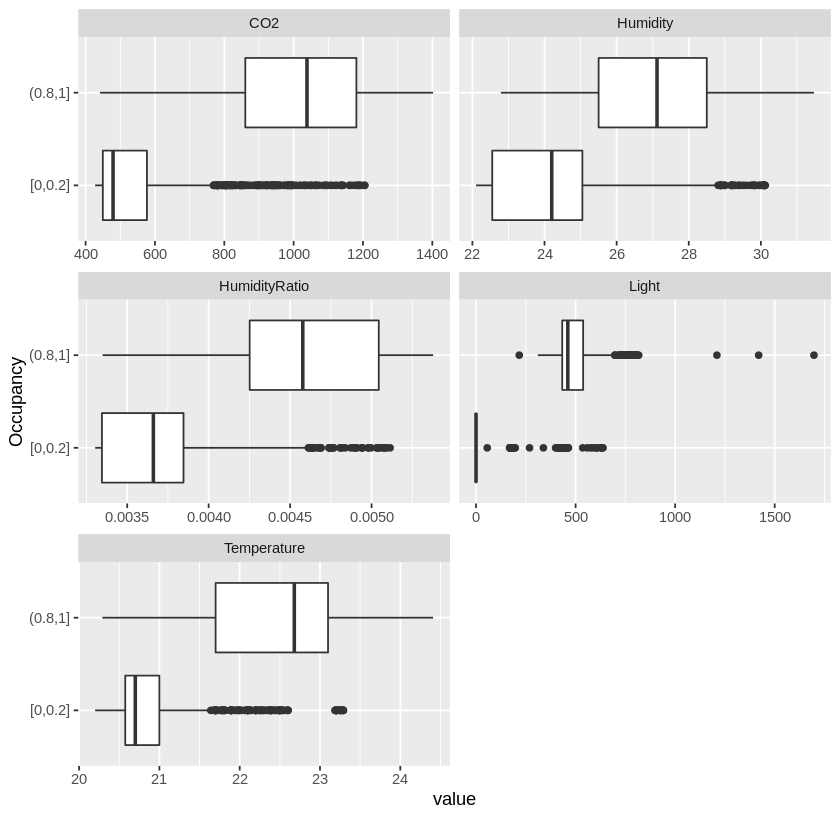

In [9]:
plot_boxplot(dt, by="Occupancy",  ncol = 2L)

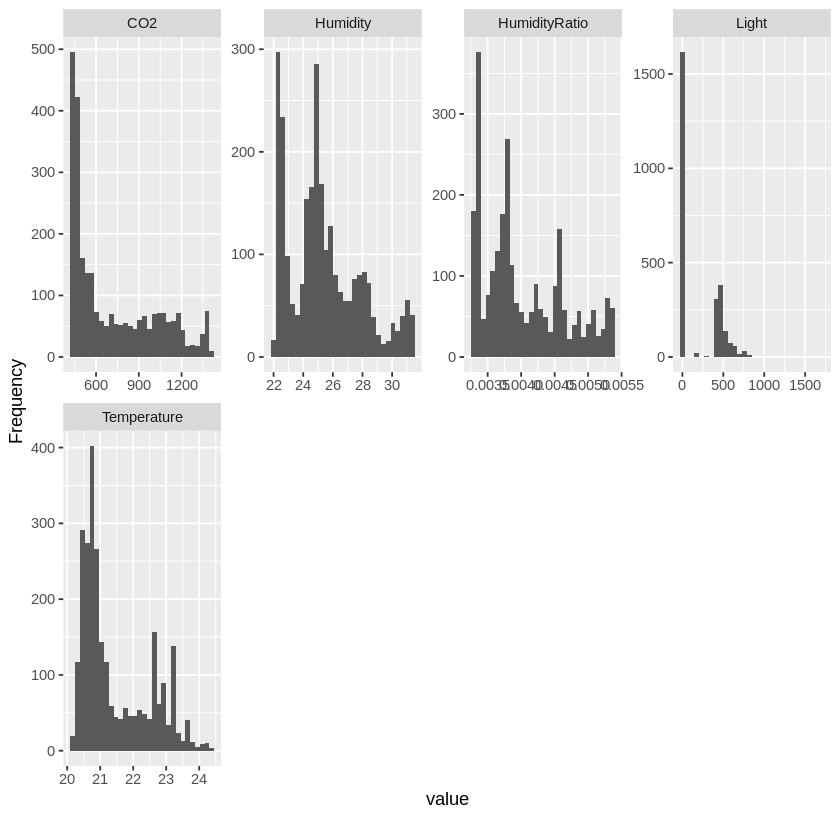

In [10]:
plot_histogram(dt)

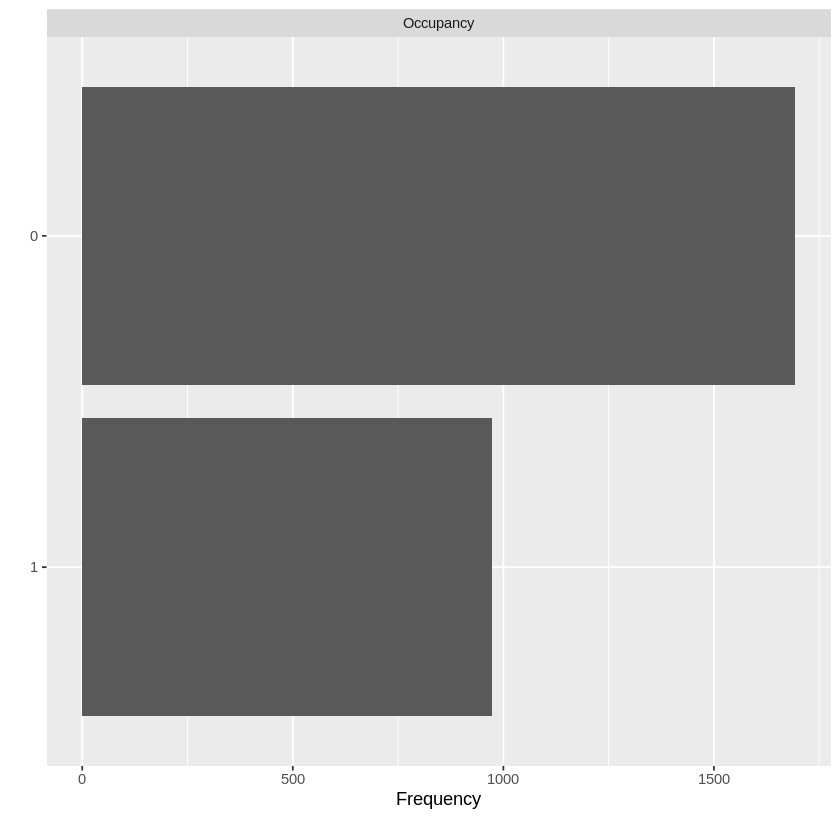

In [14]:
plot_bar(dt)

In [15]:
?plot_correlation

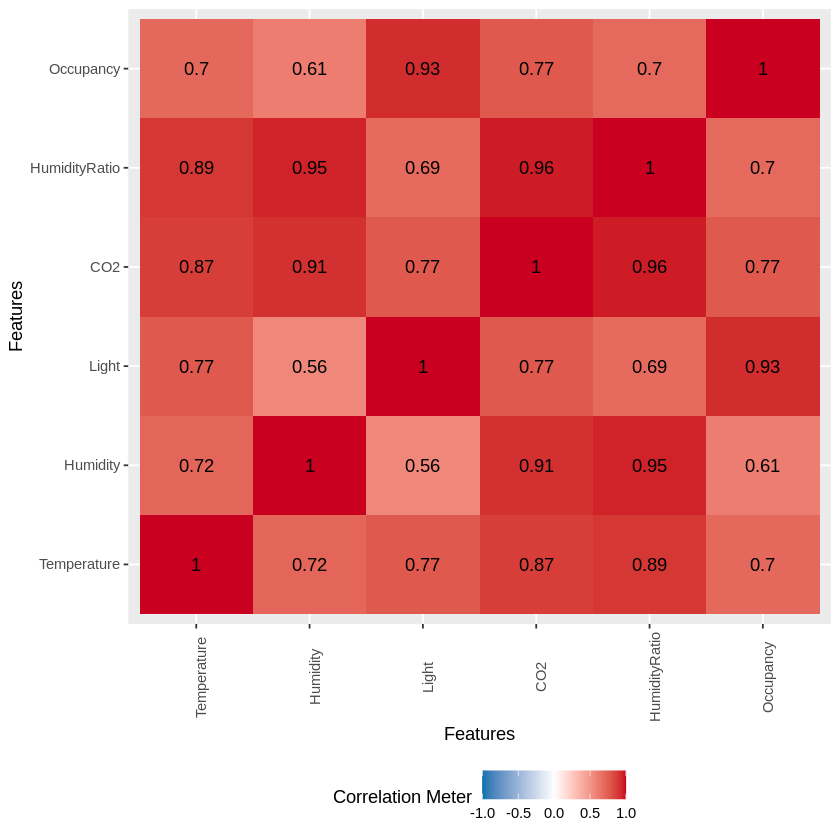

In [21]:
dt %>% select_if(is.numeric) -> dt_num
plot_correlation(na.omit(dt_num))

## 1-1-2.	
데이터에서 결측치를 탐색하고 이에 대한 적절한 대체 방법을 제시하시오. 또한 제시한 결측치 대체 방법을 구현하고 이에 따른 결과를 확인하시오. (3점)

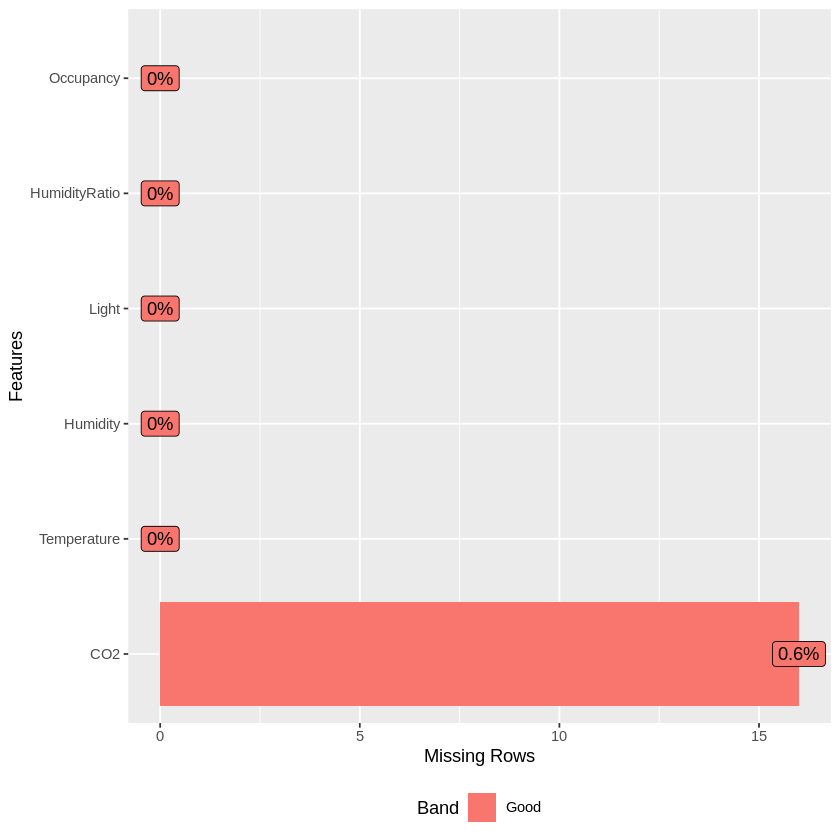

In [22]:
plot_missing(dt)


 iter imp variable
  1   1  CO2
  1   2  CO2
  1   3  CO2
  1   4  CO2
  1   5  CO2
  2   1  CO2
  2   2  CO2
  2   3  CO2
  2   4  CO2
  2   5  CO2
  3   1  CO2
  3   2  CO2
  3   3  CO2
  3   4  CO2
  3   5  CO2
  4   1  CO2
  4   2  CO2
  4   3  CO2
  4   4  CO2
  4   5  CO2
  5   1  CO2
  5   2  CO2
  5   3  CO2
  5   4  CO2
  5   5  CO2


Warning message:
“Number of logged events: 25”


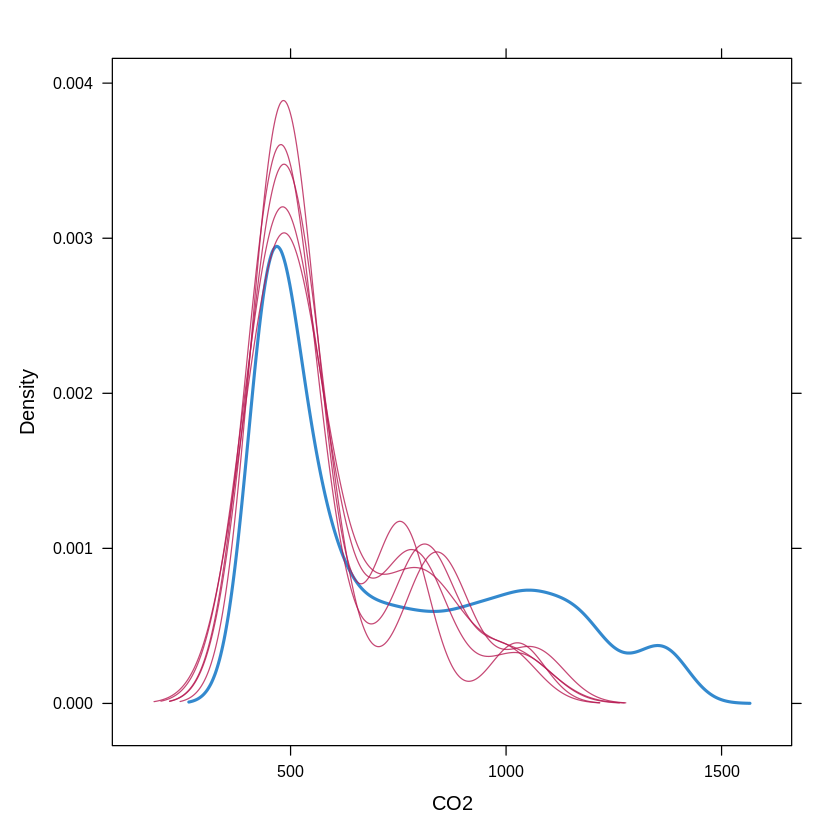

In [26]:
m = 5
seed = 49

tmp = mice(dt,
  m = m,
  seed = 2022,
  meth = 'cart')

densityplot(tmp)

In [28]:
?mice


 iter imp variable
  1   1  CO2
  1   2  CO2
  1   3  CO2
  1   4  CO2
  1   5  CO2
  2   1  CO2
  2   2  CO2
  2   3  CO2
  2   4  CO2
  2   5  CO2
  3   1  CO2
  3   2  CO2
  3   3  CO2
  3   4  CO2
  3   5  CO2
  4   1  CO2
  4   2  CO2
  4   3  CO2
  4   4  CO2
  4   5  CO2
  5   1  CO2
  5   2  CO2
  5   3  CO2
  5   4  CO2
  5   5  CO2


Warning message:
“Number of logged events: 25”


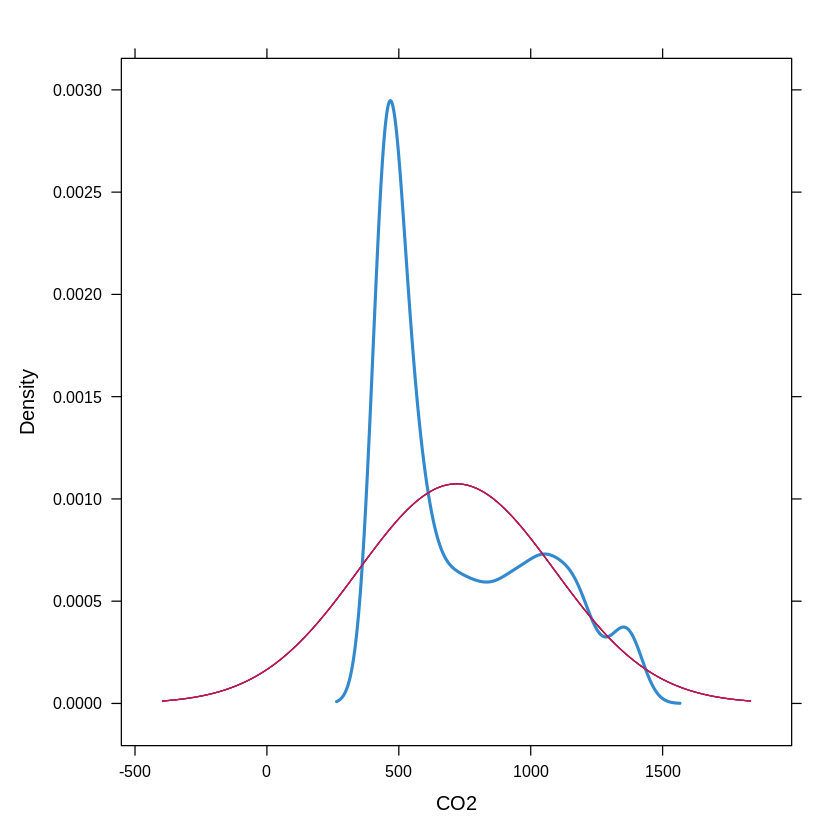

In [32]:
tmp_mean = mice(dt,
  m=5,
  meth='mean',
  seed=49)
densityplot(tmp_mean)


 iter imp variable
  1   1  CO2
  1   2  CO2
  1   3  CO2
  1   4  CO2
  1   5  CO2
  2   1  CO2
  2   2  CO2
  2   3  CO2
  2   4  CO2
  2   5  CO2
  3   1  CO2
  3   2  CO2
  3   3  CO2
  3   4  CO2
  3   5  CO2
  4   1  CO2
  4   2  CO2
  4   3  CO2
  4   4  CO2
  4   5  CO2
  5   1  CO2
  5   2  CO2
  5   3  CO2
  5   4  CO2
  5   5  CO2


Warning message:
“Number of logged events: 25”


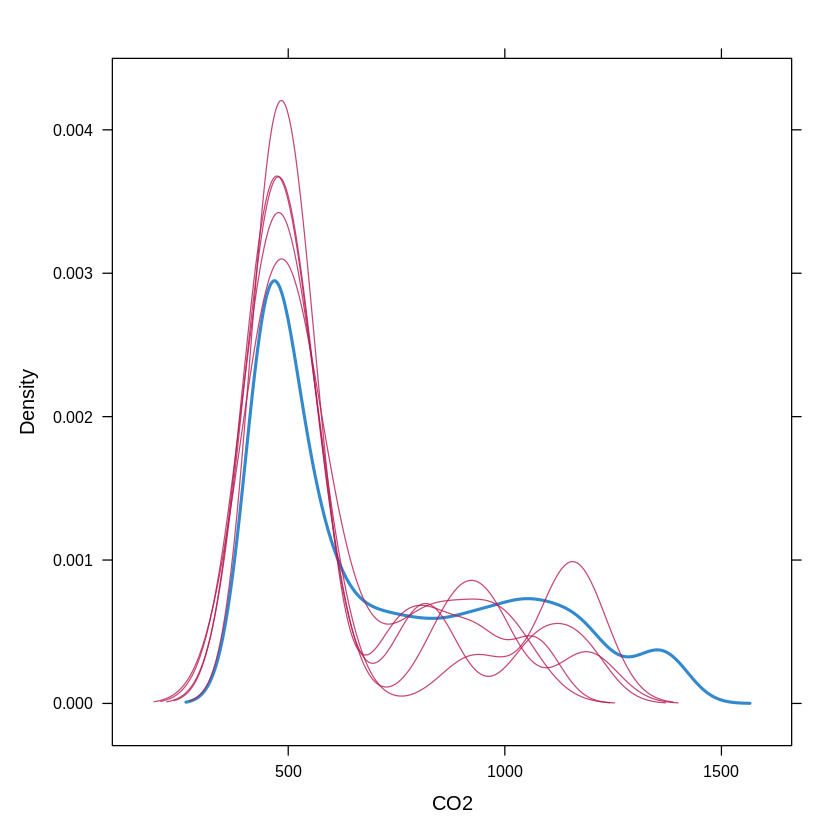

In [34]:
tmp_pmm = mice (dt,
  m=m, seed=seed, meth = 'pmm')
densityplot(tmp_pmm)

In [117]:
DT = complete(tmp_pmm, 1)

## 1-1-3.	
앞의 [1-1-2]의 결과를 기계학습(분류모델) 데이터로 활용할 때 추가로 필요한 데이터 전처리 및 품질 개선 방법이 있는지를 검토하고 제시하시오. (3점)

1. 스케일링
2. 차원축소

# 1-2.	불균형 데이터 해소를 위한 다음 과정을 수행하시오. (20점)

## 1-2-1.	
불균형 여부를 조사하고 시각화한 후 데이터 불균형이 발생하였음을 증명하시오. 또한 이 과제에서 오버샘플링을 활용할 경우 어떤 방법이 더 적합한지 장단점을 비교하여 최종 2개의 방법을 제시하시오. (5점)

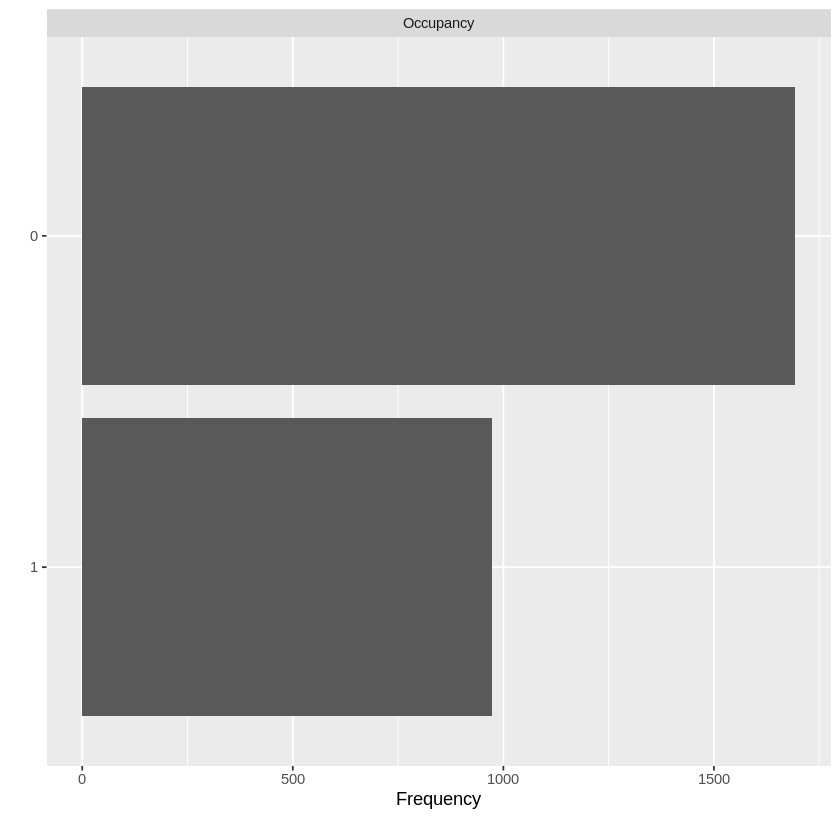

In [39]:
plot_bar(DT)

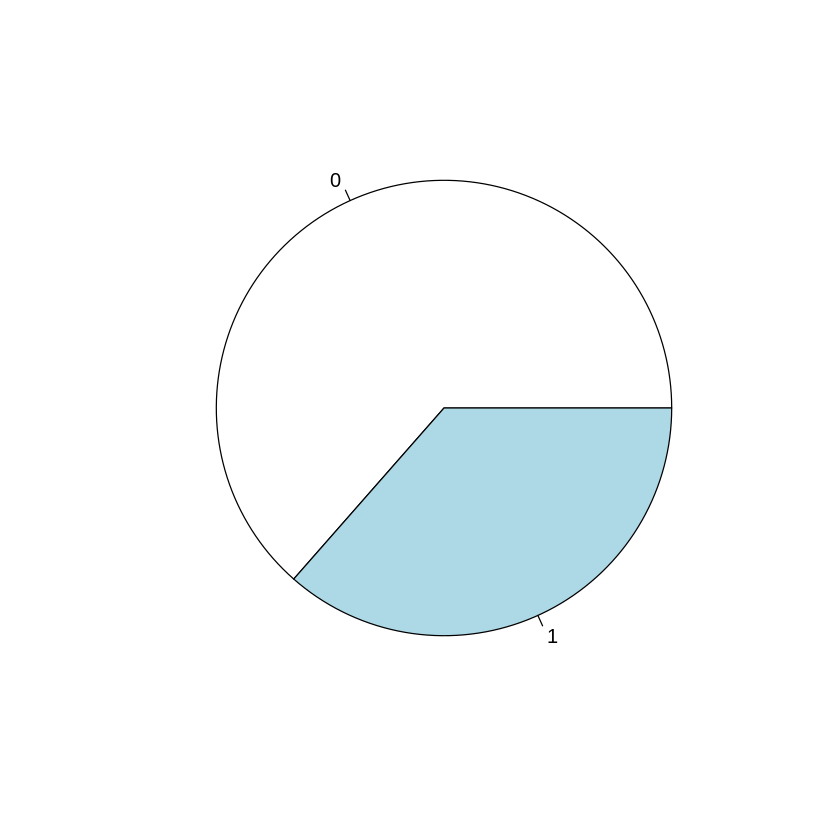

In [51]:
table(DT$Occupancy) %>% 
  prop.table*100 -> prop
pie(prop)

1. `Resampling` (장) 직관적, 쉬운데 성능 ㄱㅊ (단) 소수 클래스에 과적합 발생 가능성
2. `보더라인SMOTE` (장) 가상 관측치 생성->리샘플링 방법 보완,  보더라인 부분만 오버샘플링함->SMOTE보완 (단) 시간비용??

## 1-2-2.	
앞의 [1-2-1]에서 선택한 2개의 오버샘플링 방법을 구현하여 학습데이터 2종을 제시하시오. (10점)

In [ ]:
x = DT[, !(colnames(DT) %in% c('Occupancy'))]
target =  DT[,'Occupancy']

In [138]:
#install.packages("lubridate")
#library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [137]:
#step1. resampling
dt_up = caret::upSample(x, target)                         
table(taeget) 
#step1. blSMOTE
dt_blSMOTE = BLSMOTE(X,target,K=5)$data
#step2. split



ERROR: ignored

## 1-2-3.	
앞의 [1-2-2]에서 제시된 2종의 학습데이터를 분석하여 오버샘플링이 잘 수행되었음을 시각화를 포함하여 설명하시오. 